## import packages

In [17]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read data from csv files and merge into one df on related attribute "mal_id"

In [18]:
ratings_data = pd.read_csv("ratings_clean.csv")
anime_names = pd.read_csv("anime_clean.csv")
anime_data = pd.merge(ratings_data, anime_names, on='mal_id')
anime_data.head()

,username,mal_id,score,title,members
0,-alquimista-,306,8,Abenobashi Mahou☆Shoutengai,61562
1,AccipiterF1,306,8,Abenobashi Mahou☆Shoutengai,61562
2,AddleBoy,306,8,Abenobashi Mahou☆Shoutengai,61562
3,Kayrhandros,306,8,Abenobashi Mahou☆Shoutengai,61562
4,Krimzonrayne,306,7,Abenobashi Mahou☆Shoutengai,61562


## convert all scores into mean value and score_count

In [19]:
score_mean_count = pd.DataFrame(anime_data.groupby('title')['score'].mean())
score_mean_count['score_counts'] = pd.DataFrame(anime_data.groupby('title')['score'].count())
score_mean_count.head()

,score,score_counts
title,,
"""0""",4.000000,2
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",7.392857,28
"""Bungaku Shoujo"" Memoire",7.625000,24
"""Bungaku Shoujo"" Movie",8.027778,36
"""Eiyuu"" Kaitai",6.500000,2


## plot score count vs number of titles

most anime have 0 ratings, not sure if this is because i didnt gather enough data, or thats just how it is

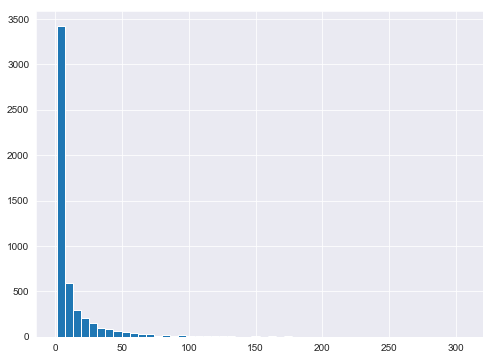

In [31]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
score_mean_count['score_counts'].hist(bins=50)  

## create dataframe from all scores/ratings from each user

In [32]:
user_anime_rating = anime_data.pivot_table(index='username', columns='title', values='score')
user_anime_rating.head()

title,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiyuu"" Kaitai","""Kinako"" x Mameshiba Movie","""Kiss Dekiru Gyoza"" x Mameshiba Movie","""R100"" x Mameshiba Original Manners",.hack//G.U. Returner,.hack//G.U. Trilogy,...,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
username,,,,,,,,,,,,,,,,,,,,,
-0rlando-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Adamu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Alina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Ayu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
-BrokenHeart-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## filter by specific anime

In [34]:
get_new_ratings = user_anime_rating["Cowboy Bebop"]
get_new_ratings.head()

username
-0rlando-        10.0
-Adamu            NaN
-Alina            NaN
-Ayu              9.0
-BrokenHeart-     NaN
Name: Cowboy Bebop, dtype: float64

## create data frame that shows correlation between specified anime and all others

In [35]:
anime_like = user_anime_rating.corrwith(get_new_ratings)
anime_like.head()

title
"0"                                               NaN
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi    0.029169
"Bungaku Shoujo" Memoire                     0.587803
"Bungaku Shoujo" Movie                       0.580366
"Eiyuu" Kaitai                                    NaN
dtype: float64

## create new dataframe with column corelation and drop NA values

In [36]:
corr_with_new = pd.DataFrame(anime_like, columns=['Correlation'])
corr_with_new.dropna(inplace=True)
corr_with_new.head()

,Correlation
title,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0.029169
"""Bungaku Shoujo"" Memoire",0.587803
"""Bungaku Shoujo"" Movie",0.580366
.hack//G.U. Returner,0.554017
.hack//G.U. Trilogy,0.301342


## filter values that have less than 50 score count

because two anime can have a 1.0 correlation but only have score count

In [37]:
corr_with_new = corr_with_new.join(score_mean_count['score_counts'])
corr_with_new[corr_with_new ['score_counts'] > 50].sort_values('Correlation', ascending=False).head(6)[1:]

,Correlation,score_counts
title,,
Toradora!,0.687455,89
Kara no Kyoukai 1: Fukan Fuukei,0.643642,51
Akatsuki no Yona,0.616664,53
Samurai Champloo,0.566415,97
Black Lagoon,0.556688,162
